In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 1) Importing Diabetes data set and necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Diabanalytics/Diabetes_data.csv')

In [5]:
sns.set()

In [6]:
#showing first 5 attributes of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Exploring Data and Attribute Association
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Check the column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# Check null values
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
# Null values not means0, but value inputs like NIL, NAN are also counted. To displat those;
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [11]:
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


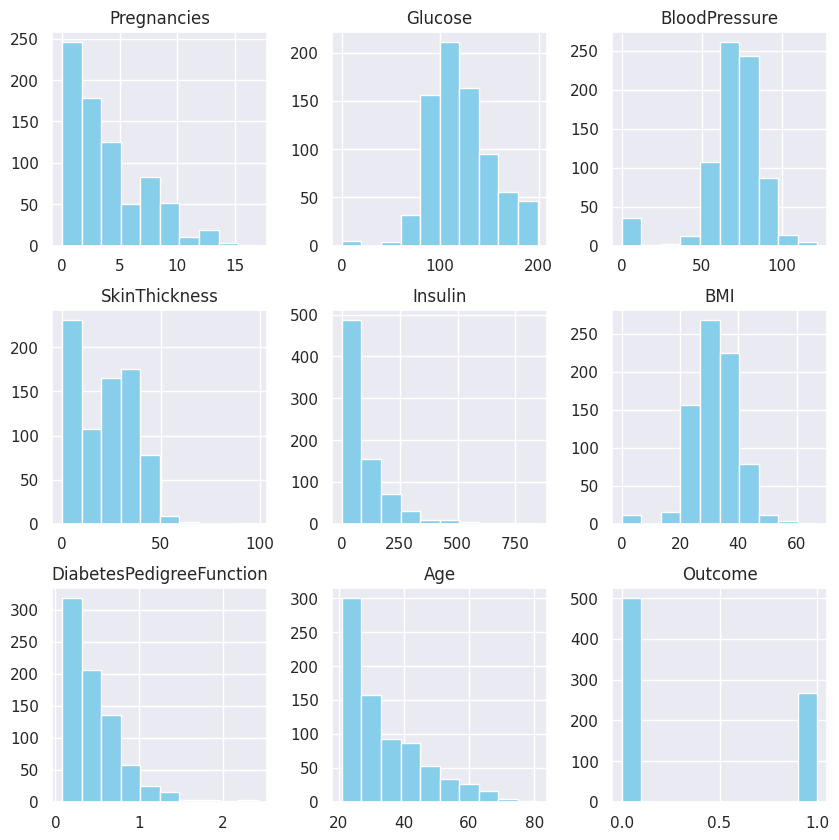

In [12]:
#plotting a histogram to infer details about value pattern
h = df.hist(figsize=(10,10), color='skyblue')

In [13]:
# Replacing null value with mean values of each column respectively
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

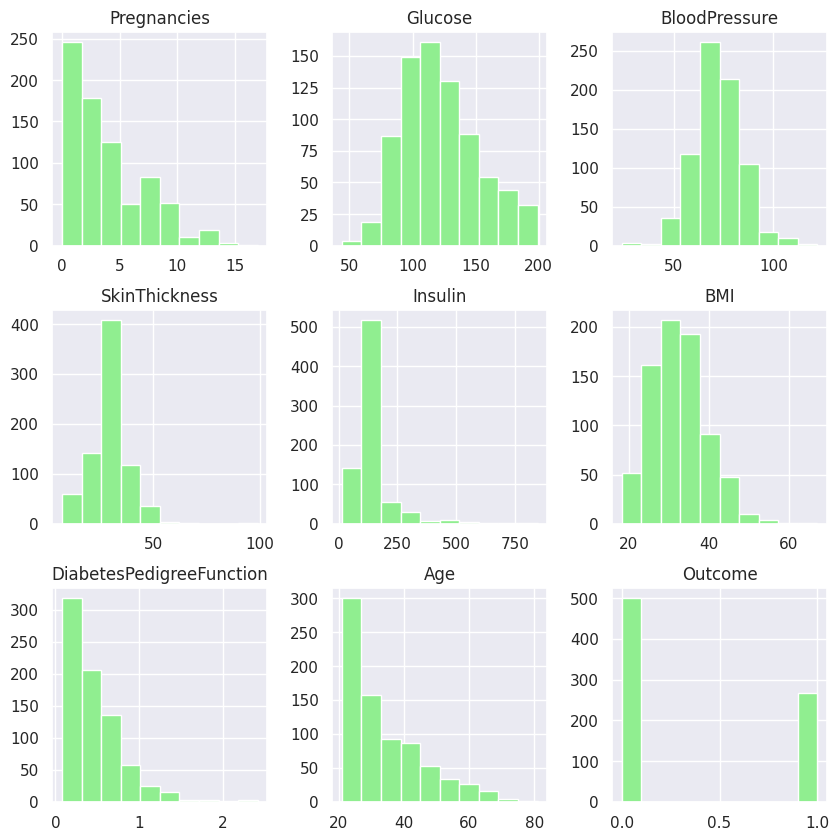

In [14]:
# Plotting a histogram after removing null values
h = df_copy.hist(figsize=(10,10),color="lightgreen")

Outcome
0    500
1    268
Name: count, dtype: int64


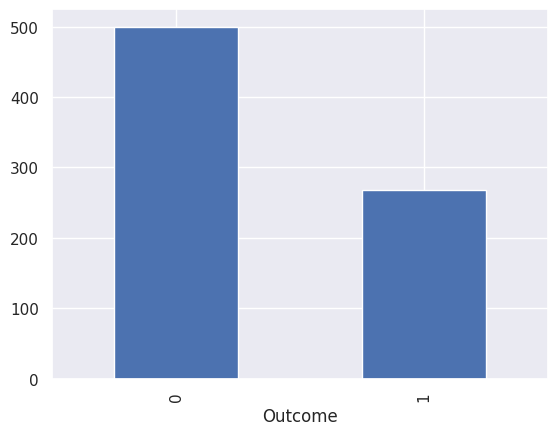

In [15]:
# Representing the outcome column balance (0 is non diabetic and 1 is diabetic patients)
color_wheel = {1: " ", 2: " "}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

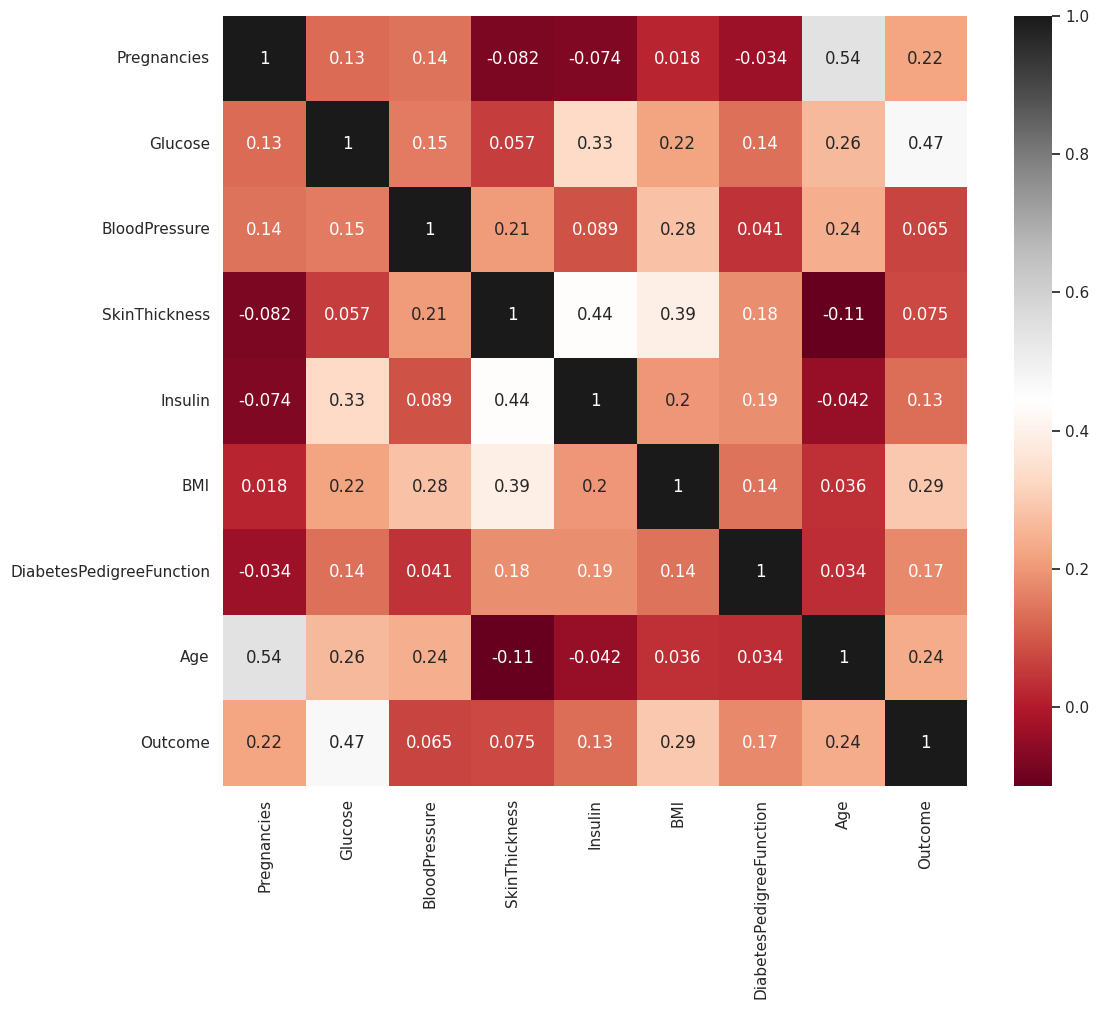

In [16]:
# As per above diagram, the diabetic patients are half as count of total patients. Next step is checking the correlation.
plt.figure(figsize=(12,10))
# calling seaborn showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdGy')

In [17]:
#From the heatmap, we can associate values, for example, insulin in correlated with glucose with value of 0.33, meaning glucose can effect insulin in body.

#Next step is scaling the data scaling, done to generalize the differences in data points.

#Importing Scaling and pre-models required for ML process.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [18]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [19]:
# Model Building
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [21]:
# Model 1 - Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
#Checking the accuracy of model
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [23]:
#Getting Accuracy score of random forest
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7598425196850394


In [24]:
#Classification report and Confusion matrix of Random Forest
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[134  28]
 [ 33  59]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       162
           1       0.68      0.64      0.66        92

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254



In [25]:
# Model 2- DecisionTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Accuracy score of Decision Tree
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7125984251968503


In [27]:
#Classification report and Confusion matrix of Decision Tree
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[129  33]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       162
           1       0.61      0.57      0.59        92

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.71      0.71      0.71       254



In [28]:
# Model 3- XgBoost classifier
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
# Accuracy score of XgBoost classifier
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7244094488188977


In [30]:
#Classification report and Confusion matrix of XgBoost classifier
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[123  39]
 [ 31  61]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       162
           1       0.61      0.66      0.64        92

    accuracy                           0.72       254
   macro avg       0.70      0.71      0.71       254
weighted avg       0.73      0.72      0.73       254



In [31]:
# Model 4- support Vector Machine (SVM)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [32]:
svc_pred = svc_model.predict(X_test)

In [33]:
# Accuracy score of SVM
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7480314960629921


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



<Axes: >

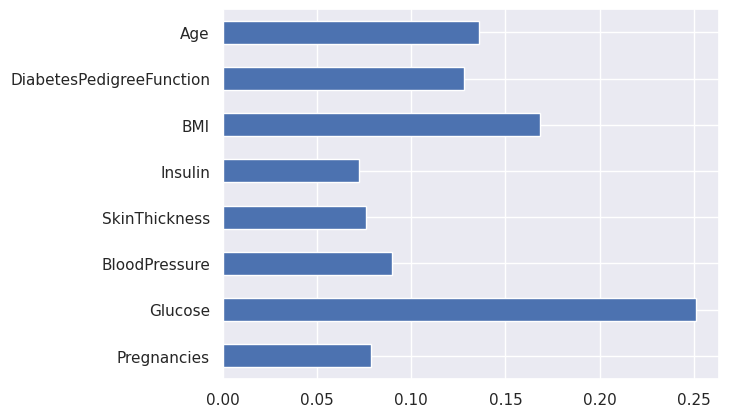

In [35]:
#finding feature importance to analyze which column feature holds most weightage in making decisions.
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

In [36]:
# 4) Saving Model
import pickle
saved_model = pickle.dumps(rfc)
#loading the saved model
rfc_from_pickle = pickle.loads(saved_model)

# use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [37]:
#Begin prediction

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [50]:
print("Enter patient data one by one to test the prediction:")

while True:
    quit_flag = False

    # Pregnancies input loop
    while True:
        Pregnancies_input = input("Enter Pregnancies (or 'no', 'n', 'esc' to quit): ").strip().lower()
        if Pregnancies_input in ['no', 'n', 'esc']:
            quit_flag = True
            break
        elif Pregnancies_input == '':
            print("Input cannot be blank. Please enter a value.")
            continue
        else:
            try:
                Pregnancies = int(Pregnancies_input)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

    if quit_flag:
        print("Exiting the prediction loop.")
        break

    def get_numeric_input(prompt, val_type=float):
        while True:
            user_input = input(prompt).strip().lower()
            if user_input in ['no', 'n', 'esc']:
                return None
            elif user_input == '':
                print("Input cannot be blank. Please enter a value.")
                continue
            try:
                return val_type(user_input)
            except ValueError:
                print(f"Invalid input. Please enter a {'number' if val_type == float else 'whole number'}.")

    glucose = get_numeric_input("Enter Glucose: ", int)
    if glucose is None:
        print("Exiting the prediction loop.")
        break
    bloodpressure = get_numeric_input("Enter Blood Pressure: ", int)
    if bloodpressure is None:
        print("Exiting the prediction loop.")
        break
    skinthickness = get_numeric_input("Enter Skin Thickness: ", int)
    if skinthickness is None:
        print("Exiting the prediction loop.")
        break
    insulin = get_numeric_input("Enter Insulin: ", int)
    if insulin is None:
        print("Exiting the prediction loop.")
        break
    bmi = get_numeric_input("Enter BMI: ", float)
    if bmi is None:
        print("Exiting the prediction loop.")
        break
    DiabetesPedigreeFunction = get_numeric_input("Enter DiabetesPedigreeFunction: ", float)
    if DiabetesPedigreeFunction is None:
        print("Exiting the prediction loop.")
        break
    age = get_numeric_input("Enter Age: ", int)
    if age is None:
        print("Exiting the prediction loop.")
        break

    print()  # Blank line after inputs

    result = rfc.predict([[Pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, DiabetesPedigreeFunction, age]])
    print(f"Current patient's chances of getting Diabetes is = {result}")

    if result[0] == 0:
        print("Means chances the patient to become Diabetic is 0")
    elif result == 1:
        print("Means chances the patient to become Diabetic is 1 or maximum")

    print()  # Blank line before continue prompt

    cont = input("Do you want to enter data for another patient? (yes/no): ").strip().lower()
    if cont in ['no', 'n', 'esc']:
        print("Exiting the prediction loop.")
        break


Enter patient data one by one to test the prediction:
Enter Pregnancies (or 'no', 'n', 'esc' to quit): 1
Enter Glucose: 126
Enter Blood Pressure: 60
Enter Skin Thickness: 0
Enter Insulin: 0
Enter BMI: 30.1
Enter DiabetesPedigreeFunction: 0.350
Enter Age: 47

Current patient's chances of getting Diabetes is = [1]
Means chances the patient to become Diabetic is 1 or maximum

Do you want to enter data for another patient? (yes/no): N
Exiting the prediction loop.


In [ ]:
5555